# in this project, you will learn practically how to handel the data  then choose the best features that affect Availability of free uber cars using Data analysis & data visualization and then using these features in logistic regression.

We will go through 5 tasks to implement our project:

          Task 1: Importing libraries and Exploring the Dataset.
          Task 2: Checking missing values .
          Task 3:  analyze the data.
          Task 4: Creating visual methods to analyze the data.
          Task 5: make logistic regression model

# Task 1: Importing libraries and Exploring the Dataset.


In [366]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set() #setting the default seaborn style for our plots
%matplotlib inline

In [367]:
#importing the dataset
uber_df=pd.read_csv("Uber Request Data.csv")
#checking the head of the data
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [368]:
#Info about the data shape of data, type of individual columns

uber_df.info()
uber_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


(6745, 6)

Expected output:

1-The data should consist of (6745) data record with (6) attributes. (1) integer64 type, (1) float type , (4) object .

2- there are missing data in ( Driver id  )  and (Drop timestamp)

# Task 2: Checking missing values .


In [369]:
# check the missing data.
uber_df.isna().apply(pd.value_counts)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
False,6745.0,6745.0,4095,6745.0,6745.0,2831
True,NaN,NaN,2650,NaN,NaN,3914


Expected output:

1- there are (2650) missing data record at Driver id.

2- there are (3914) missing data record at Drop timestamp.

#  Task 3:  analyze the data.


In [370]:
#Convert Request_timestamp & Drop_timestamp to uniform datetime format
uber_df["Request_timestamp"] = uber_df["Request timestamp"].apply(lambda x : pd.to_datetime(x))
uber_df["Drop_timestamp"] = uber_df["Drop timestamp"].apply(lambda x : pd.to_datetime(x))

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   Request_timestamp  6745 non-null   datetime64[ns]
 7   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


In [371]:
uber_df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [372]:
#Check if the Driver id is null only for 'No Cars Available' Status
uber_df[(uber_df.Status == 'No Cars Available') & (uber_df["Driver id"].isnull())].shape

(2650, 8)

In [373]:
#Check if drop timestamp is null only for 'No Cars Available' & 'Cancelled'
uber_df[((uber_df.Status == 'No Cars Available') | (uber_df.Status == 'Cancelled'))
        & (uber_df["Drop timestamp"].isnull())].shape

(3914, 8)

Expected output:

(Driver id) and (Drop timestamp)  are  lower importanet feateares for machine learning model 


In [374]:
#Extract the hour from requested timestamp
uber_df["Request hour"] = uber_df["Request_timestamp"].dt.hour
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_timestamp,Drop_timestamp,Request hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,2016-07-15 23:54:39,NaT,23


In [375]:
uber_df["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

# Task 4: Creating visual methods to analyze the data.


In [376]:
# remove Request timestamp & Drop timestamp & Request_timestamp & Drop_timestamp because :
                                                                                         # the missing data 
                                                                                         # we allready extract Request hour

uber_df.drop('Request timestamp',axis=1,inplace=True)
uber_df.drop('Drop timestamp',axis=1,inplace=True)
uber_df.drop('Request_timestamp',axis=1,inplace=True)
uber_df.drop('Drop_timestamp',axis=1,inplace=True)
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request hour
0,619,Airport,1.0,Trip Completed,11
1,867,Airport,1.0,Trip Completed,17
2,1807,City,1.0,Trip Completed,9
3,2532,Airport,1.0,Trip Completed,21
4,3112,City,1.0,Trip Completed,8


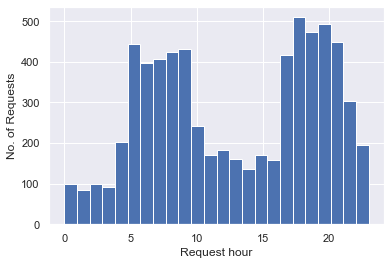

In [377]:
plt.hist(uber_df["Request hour"],bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()
#Demand is more during evening & morning hours

In [378]:
#divide the time of the day into five categories
def  period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

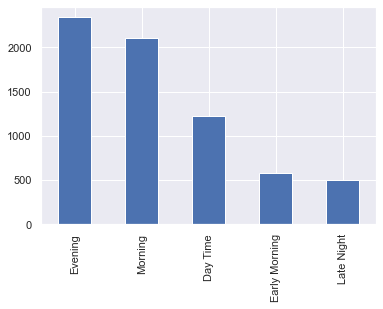

In [379]:
uber_df['Time'] = uber_df['Request hour'].apply(lambda x: period(x))
uber_df['Time'].value_counts().plot.bar()
plt.show()
#Maximum demand during 'Evening' hours


In [380]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request hour,Time
0,619,Airport,1.0,Trip Completed,11,Day Time
1,867,Airport,1.0,Trip Completed,17,Evening
2,1807,City,1.0,Trip Completed,9,Morning
3,2532,Airport,1.0,Trip Completed,21,Evening
4,3112,City,1.0,Trip Completed,8,Morning


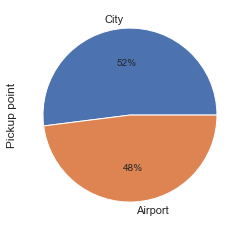

In [381]:
uber_df["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()


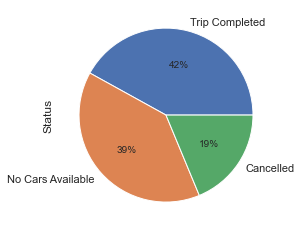

In [382]:
uber_df["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

# Task 5: make logistic regression model

In [383]:
def Availability(x):
    if  x== 'No Cars Available':
        return 0 
    else:
        return 1

In [384]:
uber_df['Availability']=uber_df['Status'].apply(lambda x : Availability(x) )
uber_df['Availability'].head()

0    1
1    1
2    1
3    1
4    1
Name: Availability, dtype: int64

In [385]:
dummy=pd.get_dummies(uber_df['Pickup point'])
dummy

,Airport,City
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
6740,0,1
6741,1,0
6742,0,1
6743,0,1


In [386]:
uber_df=pd.concat([uber_df,dummy],axis=1)
uber_df

,Request id,Pickup point,Driver id,Status,Request hour,Time,Availability,Airport,City
0,619,Airport,1.0,Trip Completed,11,Day Time,1,1,0
1,867,Airport,1.0,Trip Completed,17,Evening,1,1,0
2,1807,City,1.0,Trip Completed,9,Morning,1,0,1
3,2532,Airport,1.0,Trip Completed,21,Evening,1,1,0
4,3112,City,1.0,Trip Completed,8,Morning,1,0,1
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,Late Night,0,0,1
6741,6752,Airport,NaN,No Cars Available,23,Late Night,0,1,0
6742,6751,City,NaN,No Cars Available,23,Late Night,0,0,1
6743,6754,City,NaN,No Cars Available,23,Late Night,0,0,1


In [387]:
uber_df['Availability'].value_counts()

1    4095
0    2650
Name: Availability, dtype: int64

In [388]:
uber_df.drop('Request id',axis=1,inplace=True)
uber_df.drop('Pickup point',axis=1,inplace=True)
uber_df.drop('Driver id',axis=1,inplace=True)
uber_df.drop('Status',axis=1,inplace=True)
uber_df.drop('Time',axis=1,inplace=True)

uber_df.head()

,Request hour,Availability,Airport,City
0,11,1,1,0
1,17,1,1,0
2,9,1,0,1
3,21,1,1,0
4,8,1,0,1


In [389]:
X=uber_df.drop(columns=['Availability'])
Y=uber_df['Availability']

In [390]:
print(X.shape)
print(Y.shape)

(6745, 3)
(6745,)


In [391]:
X=np.array(X)
Y=np.array(Y)
Y=Y.reshape(-1,1)
Y.shape

(6745, 1)

In [392]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41)

In [393]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [394]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [395]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [396]:
cm

array([[361, 294],
       [199, 833]], dtype=int64)

In [397]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.7077652637818613

In [398]:
print('Accuracy is :',acc,'%')

Accuracy is : 0.7077652637818613 %


# we have accurcy 71%